In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline


In [3]:
gen = ImageDataGenerator(rotation_range=25, width_shift_range=0.2, height_shift_range=0.1, shear_range=0.25, zoom_range=0.25, 
    brightness_range=(0,3), horizontal_flip=True,vertical_flip=True,channel_shift_range=3)

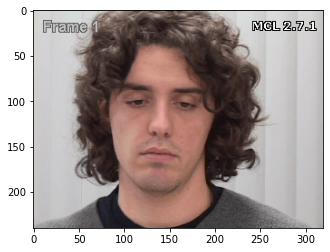

In [10]:
im=cv2.imread(r'C:\Users\kortw\Desktop\Internet Explorer\pain_detection\data\train\nopain\a.png')[::,::,::-1]
plt.imshow(im)


In [11]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [12]:
def augumentation(im,gen,path):
    im=np.expand_dims(im,0)
    i=0
    for batch in gen.flow(im,batch_size=20,save_to_dir=path,
        save_prefix="",
        save_format="png"):
        i+=1
        if i>20:
            break


In [13]:
augumentation(im,gen,'datta')

FileNotFoundError: [Errno 2] No such file or directory: 'datta\\_0_7817.png'

In [ ]:
data=[]
for img in os.listdir('datta'):
    img_arr = cv2.imread(os.path.join('datta', img))[...,::-1]
    data.append(img_arr)
    

In [8]:
plotImages(data)

NameError: name 'data' is not defined

In [1]:
labels=['nopain','moderate','severe'] 
classs=['train','val']
for cl in classs:
    path=os.path.join('data',cl)
    for label in labels: 
        imm_path = os.path.join(path, label)
        for img in os.listdir(imm_path):
                try:
                    im= cv2.imread(os.path.join(imm_path, img))[...,::-1] #convert BGR to RGB format
                    augumentation(im,gen,imm_path)
                except Exception as e:
                    print(e)


NameError: name 'os' is not defined